# Name - Avivartta Krishna
# ID - 1261351
# Class - DTSC 620 M01
# Project Assignment 1





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv")

In [ ]:
spam.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [ ]:
print(spam.columns)

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')


In [ ]:
spam.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

# Decision Tree
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total']
X = spam[feature_cols] # Features
y = spam.Class # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7826, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8794779227992224


In [ ]:
!pip install graphviz 
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


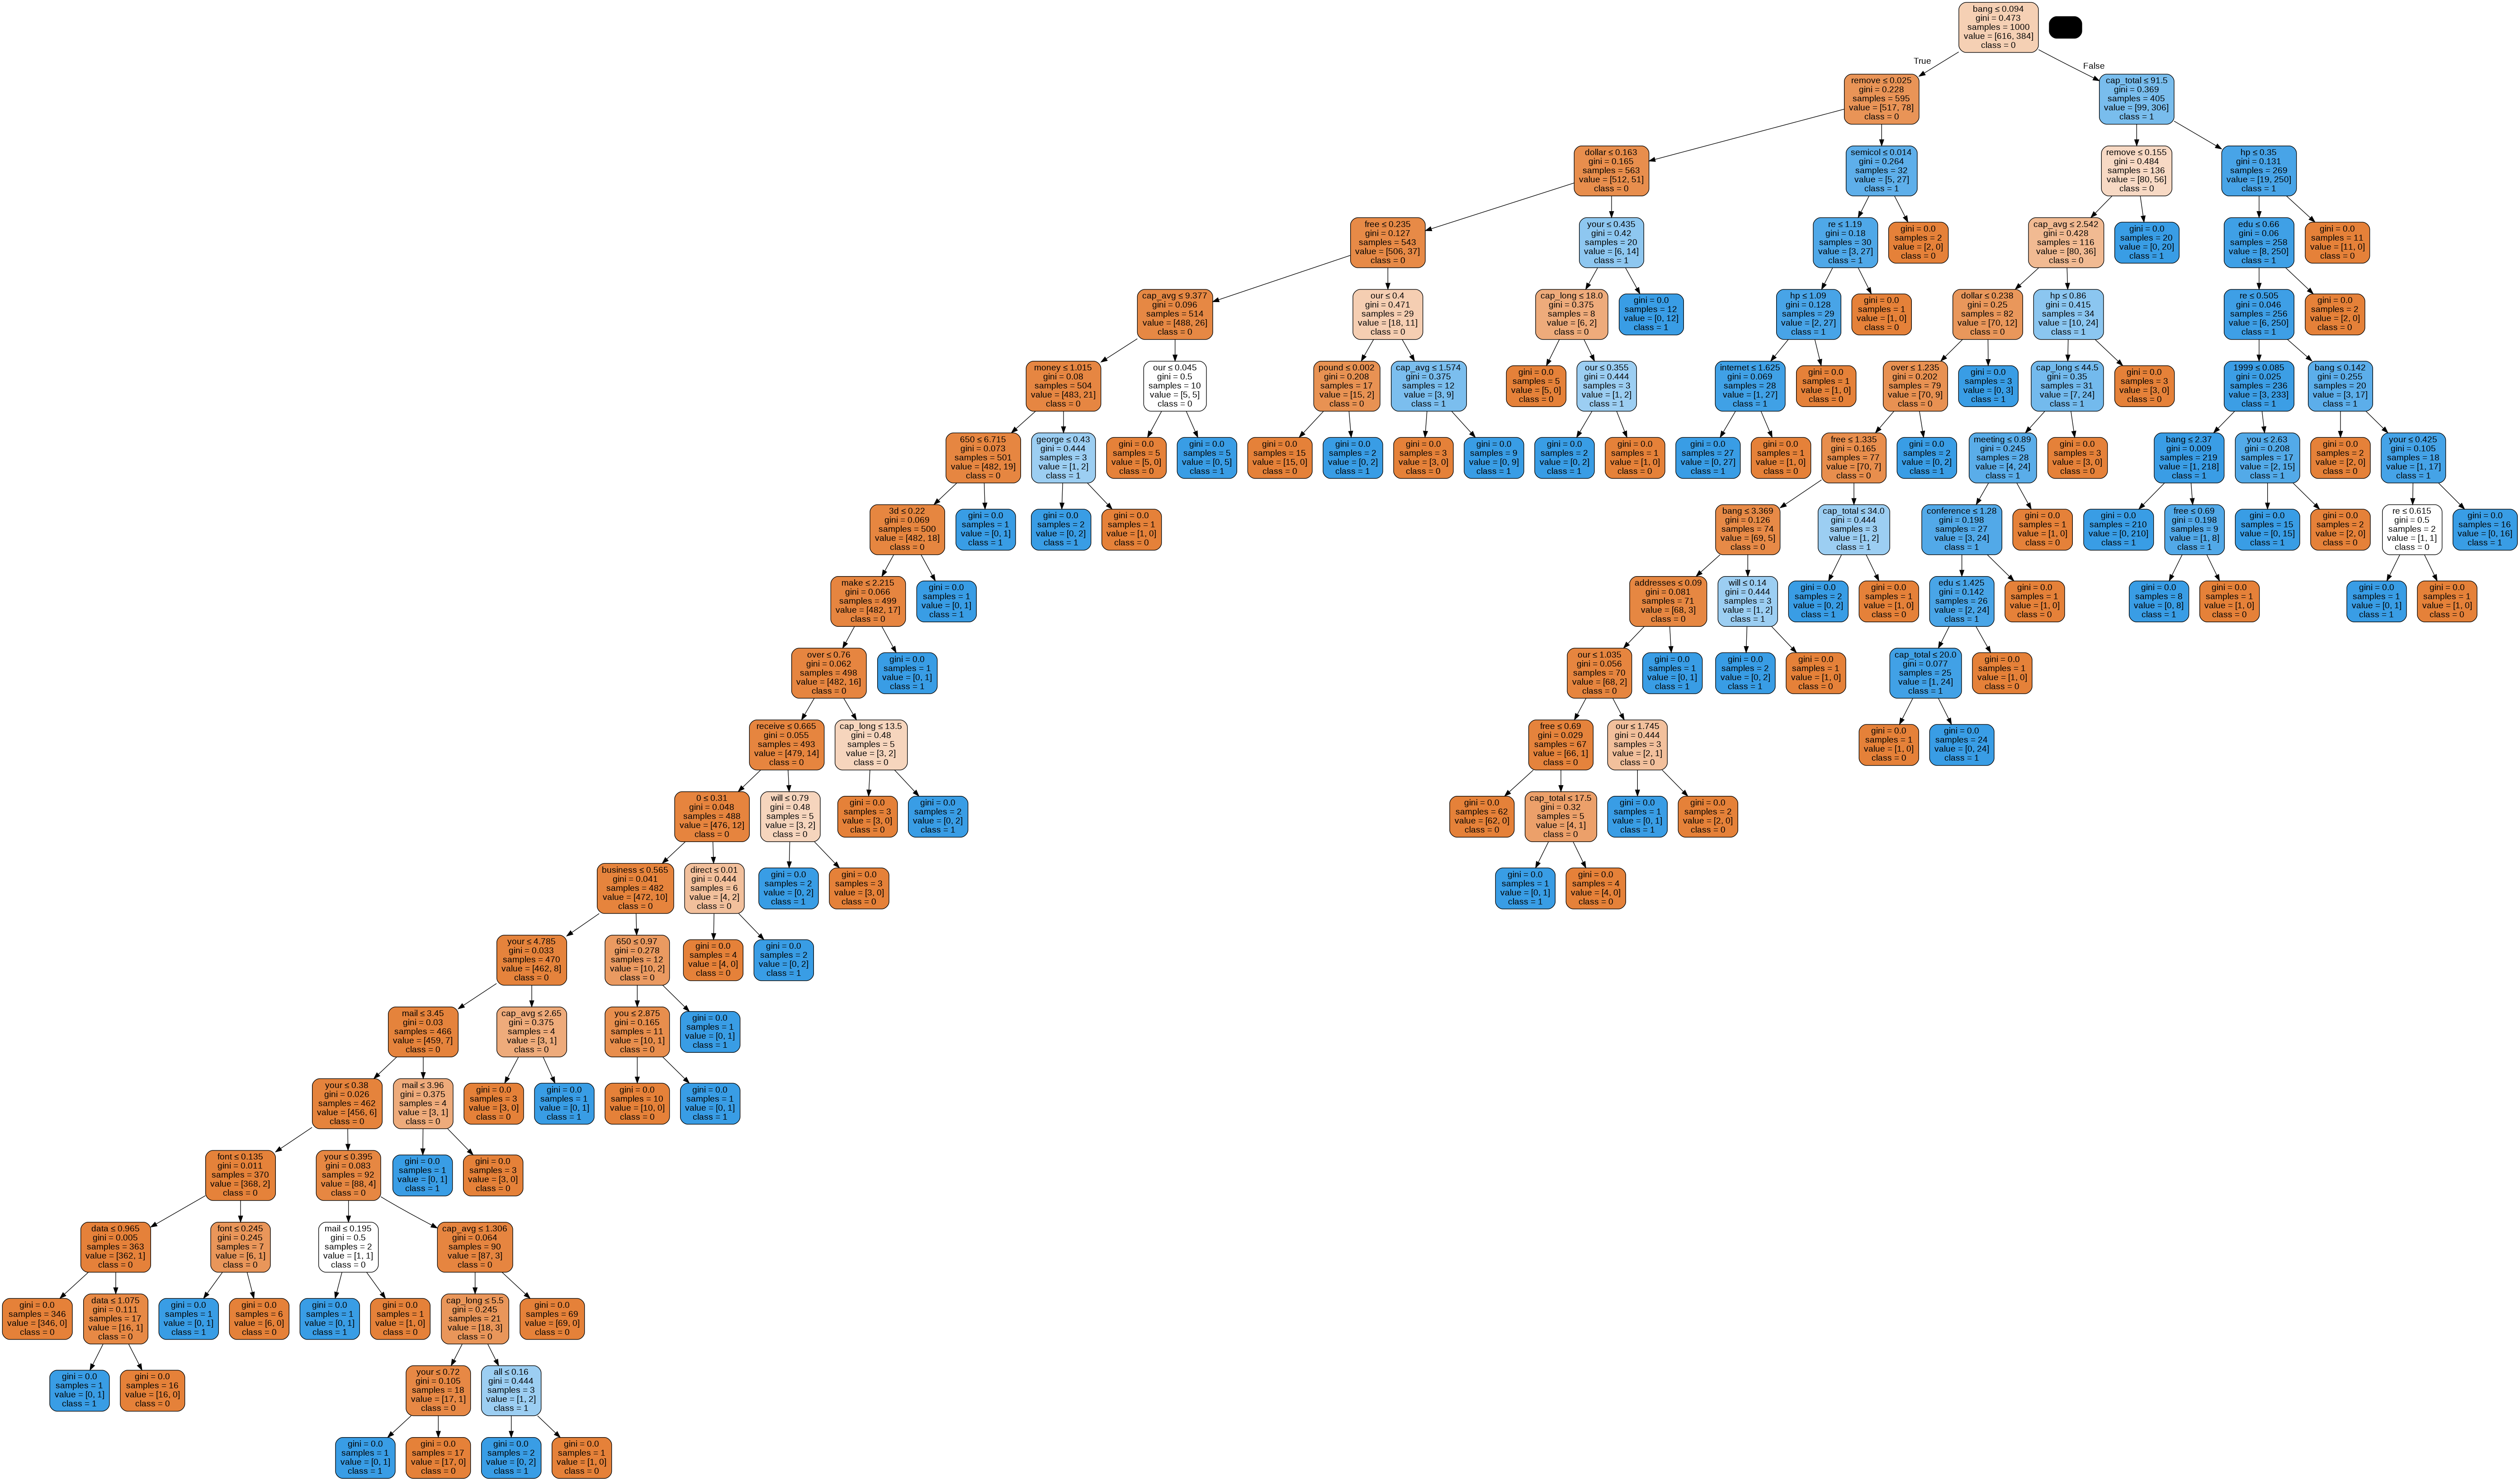

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Class.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=30)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8789225215217995


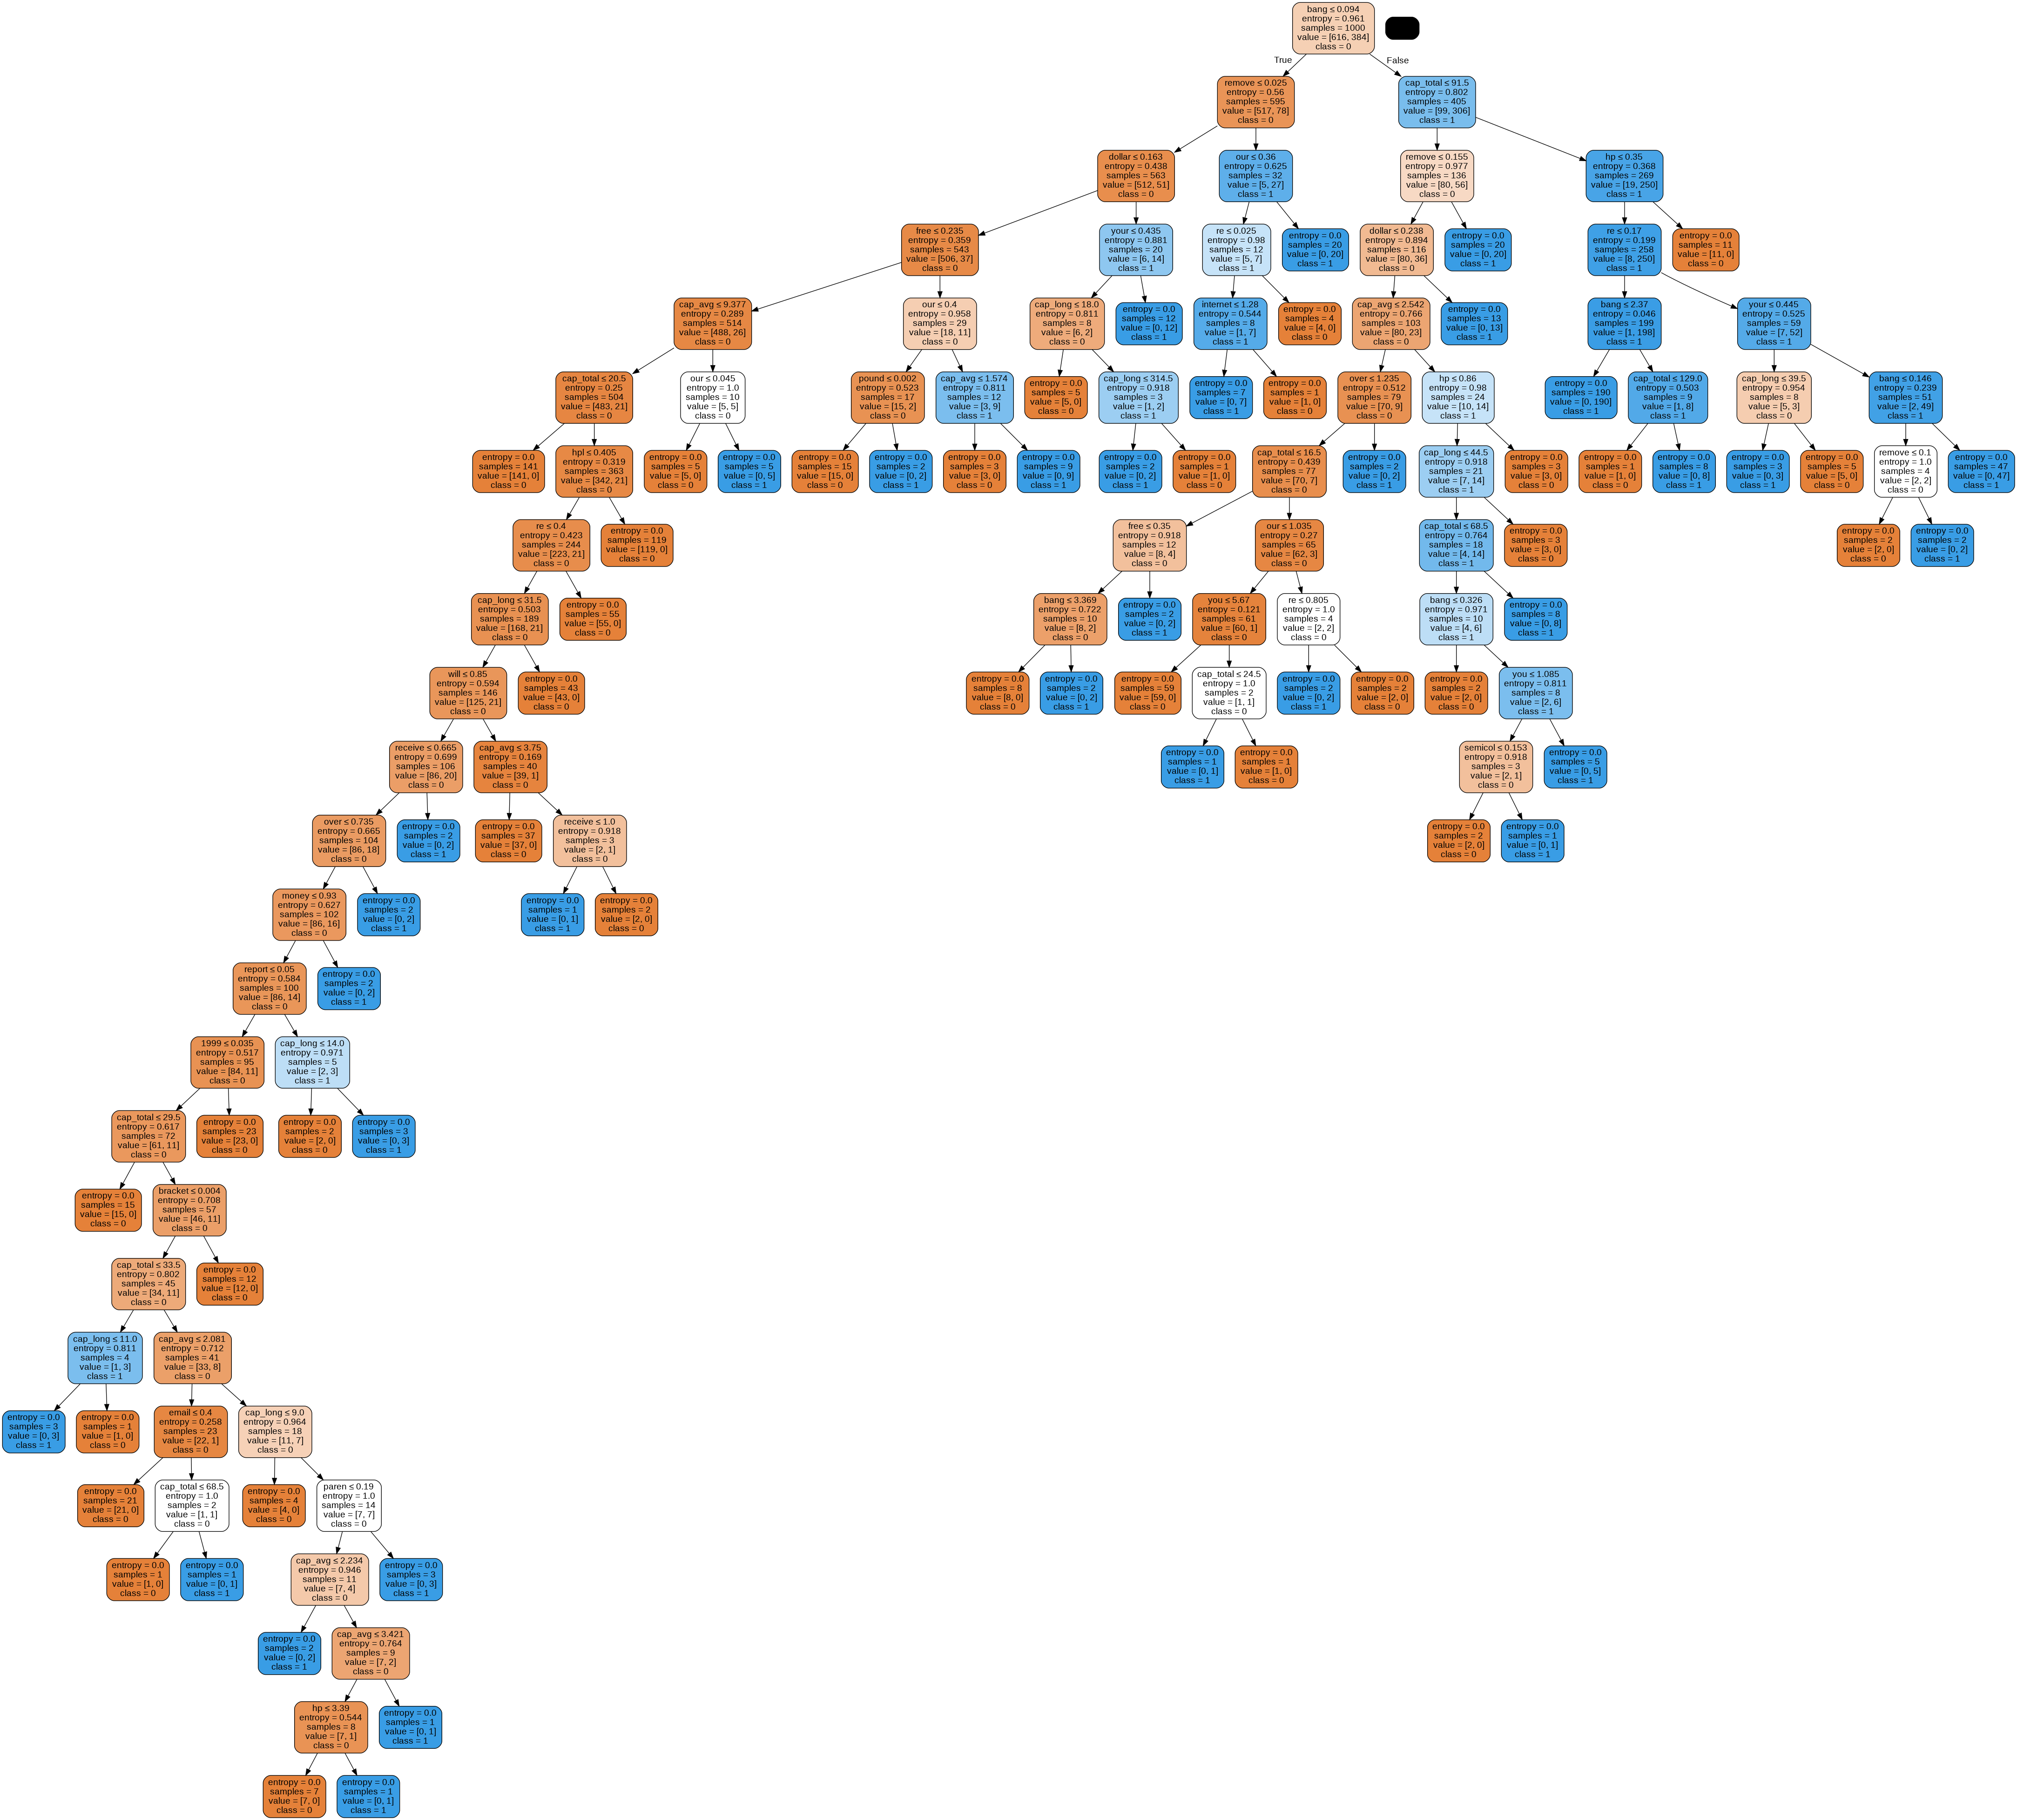

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Class.png')
Image(graph.create_png())

DECISION TREE CLASSIFIER MODEL
              precision    recall  f1-score   support

         ham       0.90      0.90      0.90      2190
        spam       0.84      0.85      0.85      1411

    accuracy                           0.88      3601
   macro avg       0.87      0.87      0.87      3601
weighted avg       0.88      0.88      0.88      3601



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

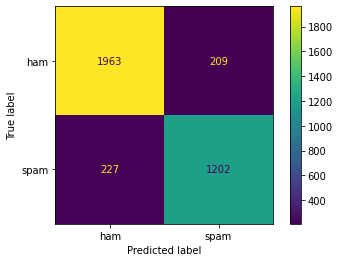

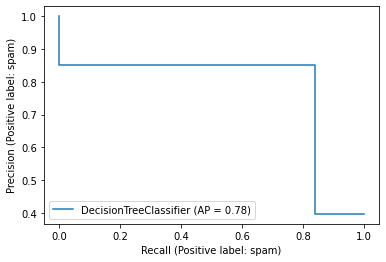

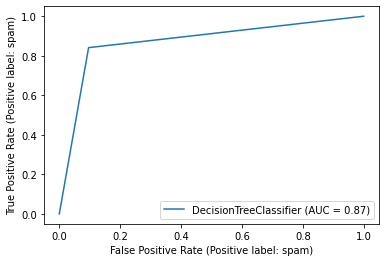

In [ ]:
print("DECISION TREE CLASSIFIER MODEL")
report(clf)

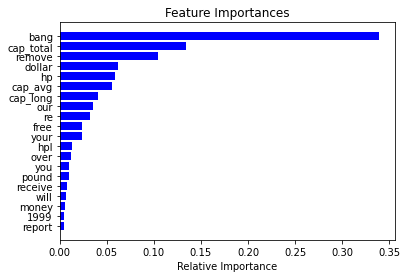

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
j = 20# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='b', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

#Random Forest 

In [ ]:
spam.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [ ]:
rfc_model1=RandomForestClassifier(n_estimators = 10, max_features='auto')
rfc_model1.fit(X_train,y_train)

'''Compare the accuracies of the Random Forest classifier as a function of the number of base 
learners (e.g., 10, 50, 100, 500, 1000, and 5000) and the number of features to consider at each 
split (e.g., auto or sqrt).'''

'Compare the accuracies of the Random Forest classifier as a function of the number of base \nlearners (e.g., 10, 50, 100, 500, 1000, and 5000) and the number of features to consider at each \nsplit (e.g., auto or sqrt).'

In [ ]:
#Return the mean accuracy on the given test data and labels
rfc_model1.score(X_test, y_test)

0.9183560122188281

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =10)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.9255762288253263

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =50)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.927797833935018

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =100)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.9316856428769786

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =500)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.9327964454318245

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =1000)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.932518744793113

In [ ]:
rfc_model2=RandomForestClassifier(n_estimators =5000)
rfc_model2.fit(X_train,y_train)
rfc_model2.score(X_test, y_test)

0.9344626492640933

#changing the the number of features to consider at each split

In [ ]:
rfc_model= RandomForestClassifier(max_features='auto')
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test, y_test)

0.9336295473479589

In [ ]:
rfc_model=RandomForestClassifier(n_estimators =100, max_features='auto')
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test, y_test)

0.9327964454318245

In [ ]:
rfc_model3=RandomForestClassifier(n_estimators =100, max_features='sqrt')
#If "sqrt", then max_features=sqrt(n_features) (same as "auto").
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test, y_test)

0.9305748403221328

In [ ]:
rfc_model3=RandomForestClassifier(n_estimators =100, max_features='log2')
#If "sqrt", then max_features=sqrt(n_features) (same as "auto").
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test, y_test)

0.932518744793113

In [ ]:
# let's set the model with the highest score for further testing
rfc_model = rfc_model
# plotting by changing the estimators
fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(rfc_model.estimators_[1], filled=True)

<Figure size 1800x1440 with 0 Axes>

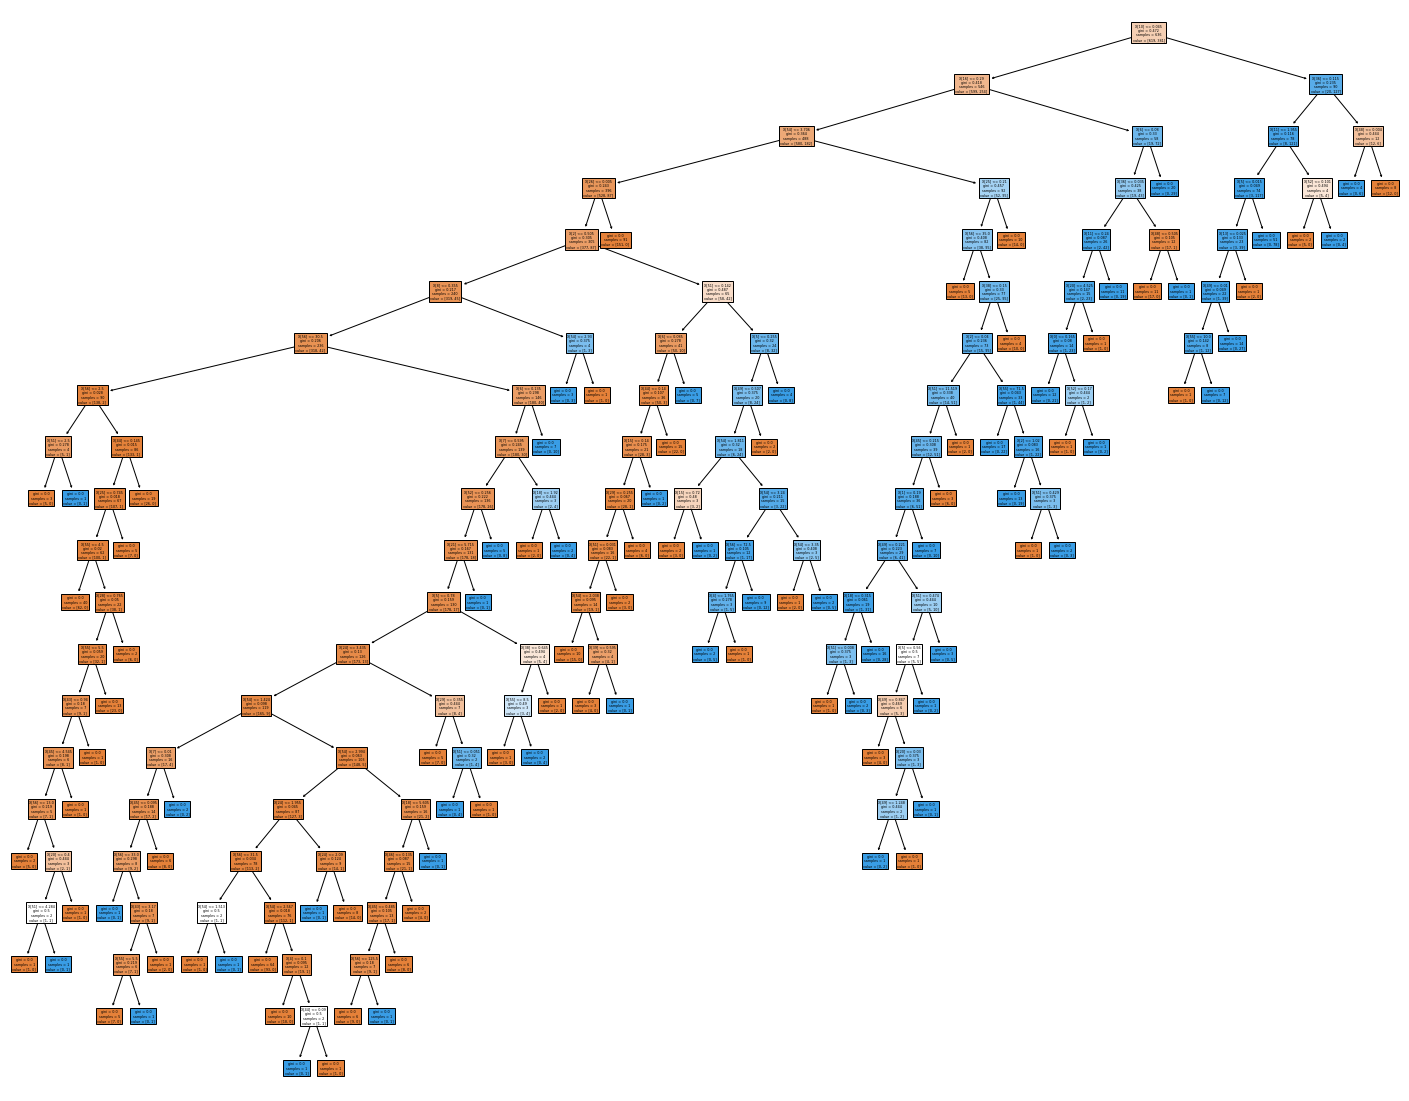

In [ ]:
#visualizing 
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(rfc_model.estimators_[10], filled=True)

RANDOM FOREST MODEL
              precision    recall  f1-score   support

         ham       0.96      0.93      0.95      2253
        spam       0.89      0.94      0.91      1348

    accuracy                           0.93      3601
   macro avg       0.92      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

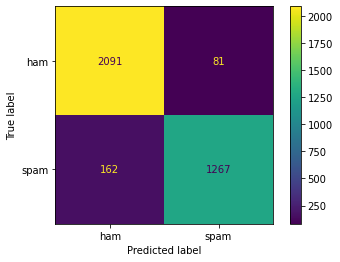

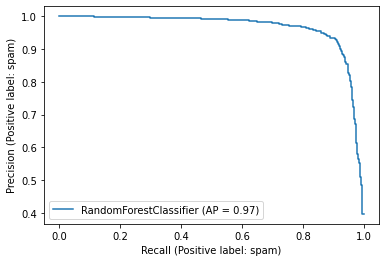

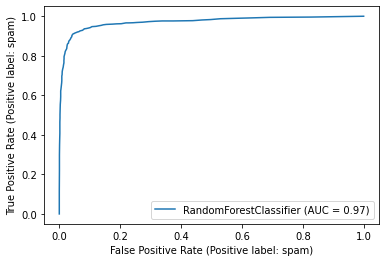

In [ ]:
print("RANDOM FOREST MODEL")
report(rfc_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


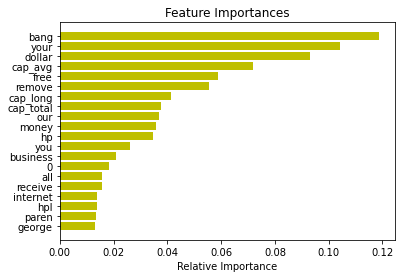

In [ ]:
importances = rfc_model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
j = 20# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='Y', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

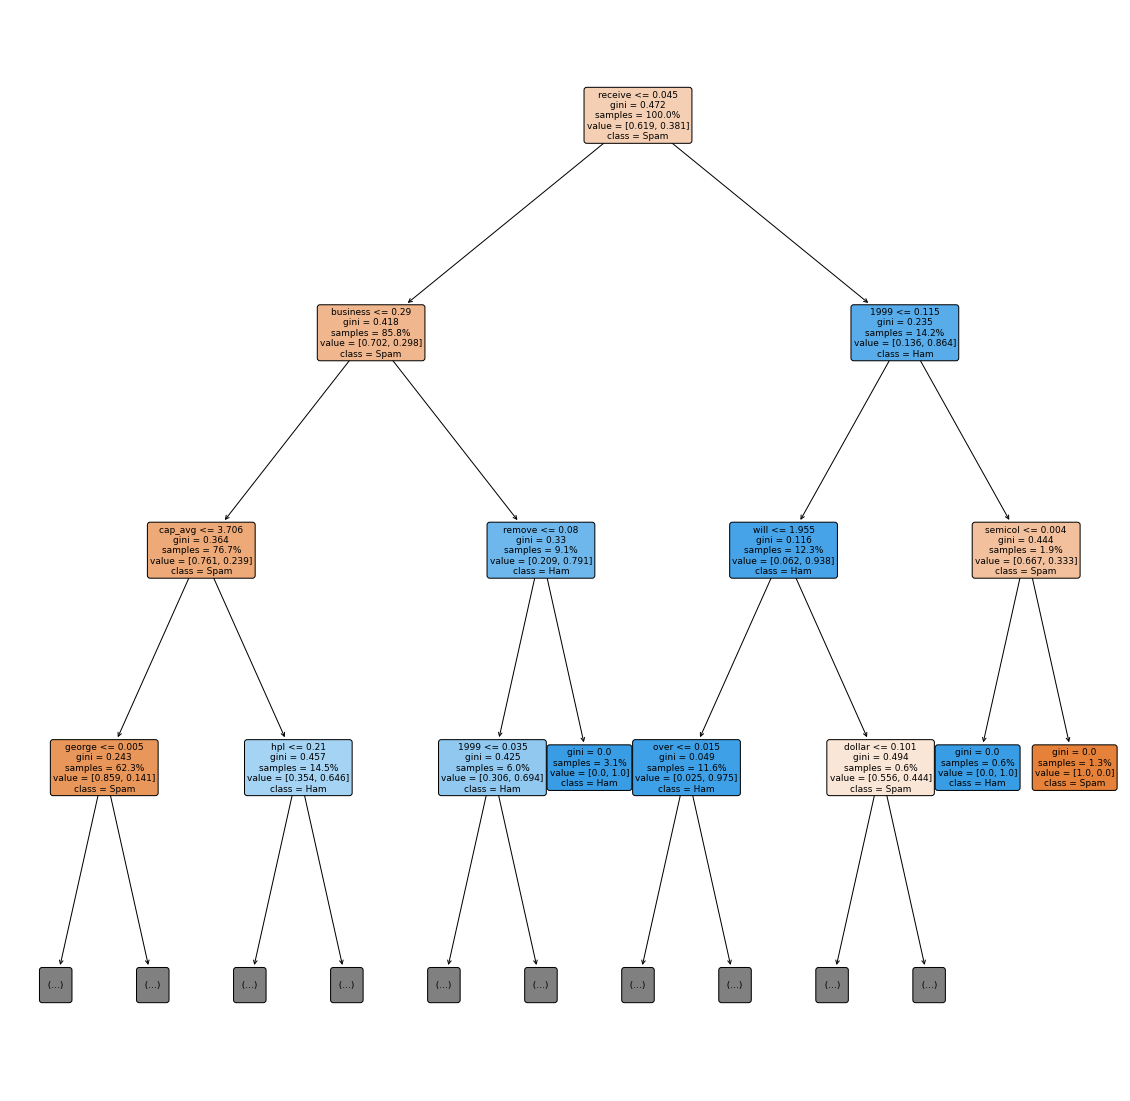

In [ ]:
# visualization
fig = plt.figure(figsize=(20, 20))
vis = tree.plot_tree(rfc_model.estimators_[10], feature_names = df.columns, class_names = ['Spam', 'Ham'], max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True)

# Final Statement: the **Random Forest Classifier** has a better performance since it classified 2094 data points correctly, as opposed to the **Decision Tree** which only classified 1930 data points correctly.